SVM Accuracy: 0.9777777777777777
SVM Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Random Forest Accuracy: 1.0
Random Forest Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


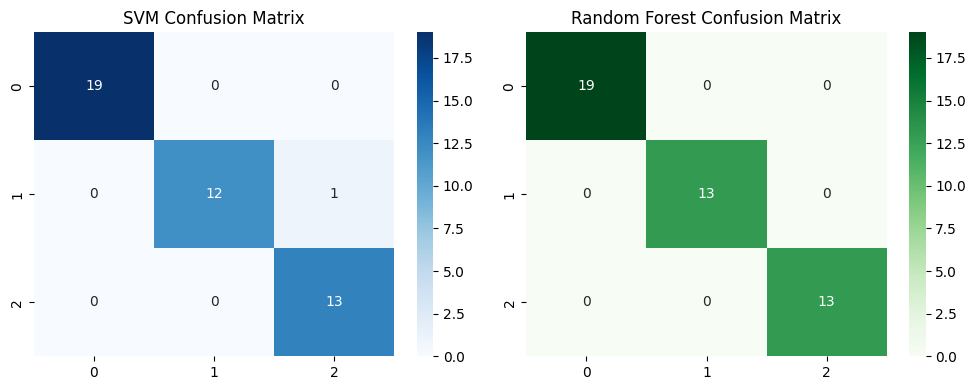

In [ ]:

import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Load dataset
iris = load_iris()
X = iris.data
y = iris.target

# 3. Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


# ----------------------------------
# Part A: SUPPORT VECTOR MACHINE
# ----------------------------------
# 5. Initialize and train SVM
svm_model = SVC(kernel='linear')  # You can also try 'rbf', 'poly'
svm_model.fit(X_train, y_train)

# 6. Predict and evaluate SVM
y_pred_svm = svm_model.predict(X_test)
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("SVM Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

# ----------------------------------
# Part B: RANDOM FOREST
# ----------------------------------
# 7. Initialize and train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 8. Predict and evaluate Random Forest
y_pred_rf = rf_model.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

# 9. (Optional) Visual comparison using seaborn heatmap
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap='Blues')
plt.title("SVM Confusion Matrix")

plt.subplot(1, 2, 2)
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap='Greens')
plt.title("Random Forest Confusion Matrix")

plt.tight_layout()
plt.show()